Identify a specific news source category the effect of which you would like to study – this might be release of economic statistics, employment numbers, quarterly results of a stocks, the budget declarations in India or Fed Rate cuts/rate increases in USA

Download and collate data for all historical instances of these news events for the last 5-10 years based on feasibility.

Also download/access data of relevant stocks or broad market indices for the same period

A simple approach to measure the effect of an event is to identify the size of its reaction. This can be done by comparing the volatility of the current day with the average volatility of the recent past, using the true range calculation:

Determine the optimal values of Volatility Ratio that has greatest predictive power in back-tests
Device a simple trading strategy that trades any of the broad market indices based on buy-sell signals generated from Volatility as an event driven indicator

In [19]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL']
data = data.DataReader('AAPL', 'yahoo', start, end)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-06-01,17.299999,17.312857,16.898571,16.914286,15.162531,221315500
2007-06-04,16.947144,17.389999,16.842857,17.332857,15.537753,221668300
2007-06-05,17.344286,17.527143,17.214285,17.524286,15.709361,230196400
2007-06-06,17.471428,17.721428,17.421429,17.662857,15.833576,278060300
2007-06-07,17.855715,18.230000,17.598572,17.724285,15.888645,478769900


In [20]:
# Compute the logarithmic returns using the Closing price 
data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
data['Volatility'] = pd.rolling_std(data['Log_Ret'], window=252) * np.sqrt(252)
data['ATR'] = abs (data['High'] - data['Low'])
data.tail()

C:\Users\Aether Analytics\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()


,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility,ATR
Date,,,,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,175.009995,16349400,0.000000,0.173505,0.919998
2017-12-26,170.800003,171.470001,169.679993,170.570007,170.570007,33185500,-0.025697,0.175642,1.790008
2017-12-27,170.100006,170.779999,169.710007,170.600006,170.600006,21498200,0.000176,0.175581,1.069992
2017-12-28,171.000000,171.850006,170.479996,171.080002,171.080002,16480200,0.002810,0.175490,1.370010
2017-12-29,170.520004,170.589996,169.220001,169.229996,169.229996,25999900,-0.010873,0.175918,1.369995


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010726BA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000110B8048>], dtype=object)

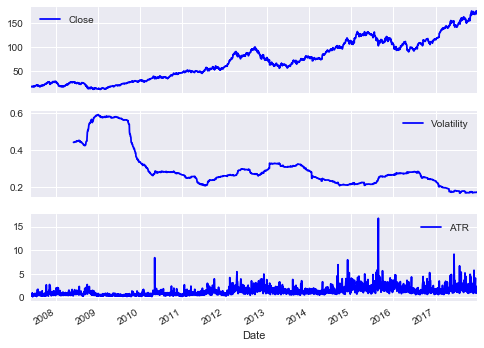

In [21]:
data[['Close', 'Volatility', 'ATR']].plot(subplots=True, color='blue',figsize=(8, 6))

In [24]:
data['ATR5'] = (data['ATR'].rolling(min_periods=1, window=5).sum())/4
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility,ATR,ATR5
Date,,,,,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,175.009995,16349400,0.000000,0.173505,0.919998,2.162498
2017-12-26,170.800003,171.470001,169.679993,170.570007,170.570007,33185500,-0.025697,0.175642,1.790008,2.025001
2017-12-27,170.100006,170.779999,169.710007,170.600006,170.600006,21498200,0.000176,0.175581,1.069992,1.967498
2017-12-28,171.000000,171.850006,170.479996,171.080002,171.080002,16480200,0.002810,0.175490,1.370010,1.767501
2017-12-29,170.520004,170.589996,169.220001,169.229996,169.229996,25999900,-0.010873,0.175918,1.369995,1.630001


In [27]:
data['VolRatio'] = (data['ATR'] / data['ATR5'])
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility,ATR,ATR5,VolRatio
Date,,,,,,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,175.009995,16349400,0.000000,0.173505,0.919998,2.162498,0.425433
2017-12-26,170.800003,171.470001,169.679993,170.570007,170.570007,33185500,-0.025697,0.175642,1.790008,2.025001,0.883954
2017-12-27,170.100006,170.779999,169.710007,170.600006,170.600006,21498200,0.000176,0.175581,1.069992,1.967498,0.543834
2017-12-28,171.000000,171.850006,170.479996,171.080002,171.080002,16480200,0.002810,0.175490,1.370010,1.767501,0.775111
2017-12-29,170.520004,170.589996,169.220001,169.229996,169.229996,25999900,-0.010873,0.175918,1.369995,1.630001,0.840487


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E03F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012187F98>], dtype=object)

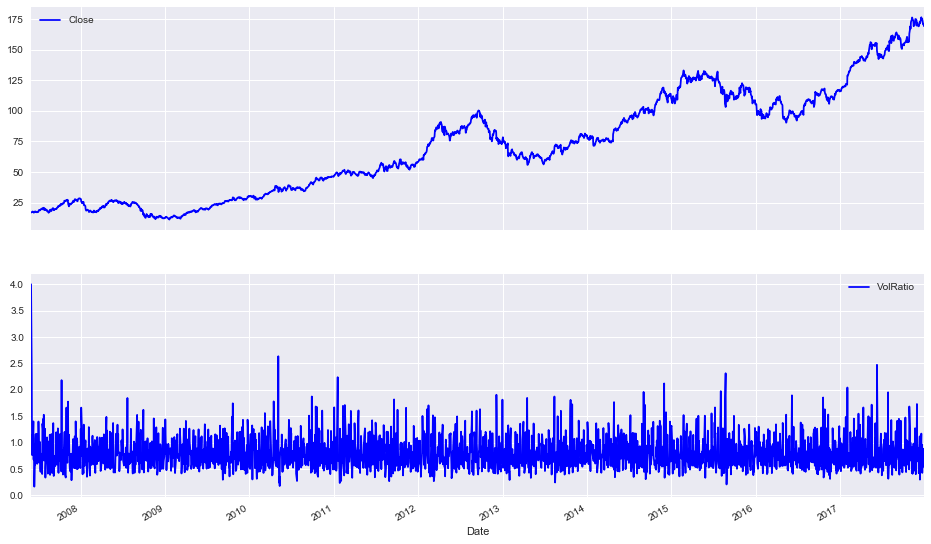

In [30]:
data[['Close', 'VolRatio']].plot(subplots=True, color='blue',figsize=(16, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012EF7A58>], dtype=object)

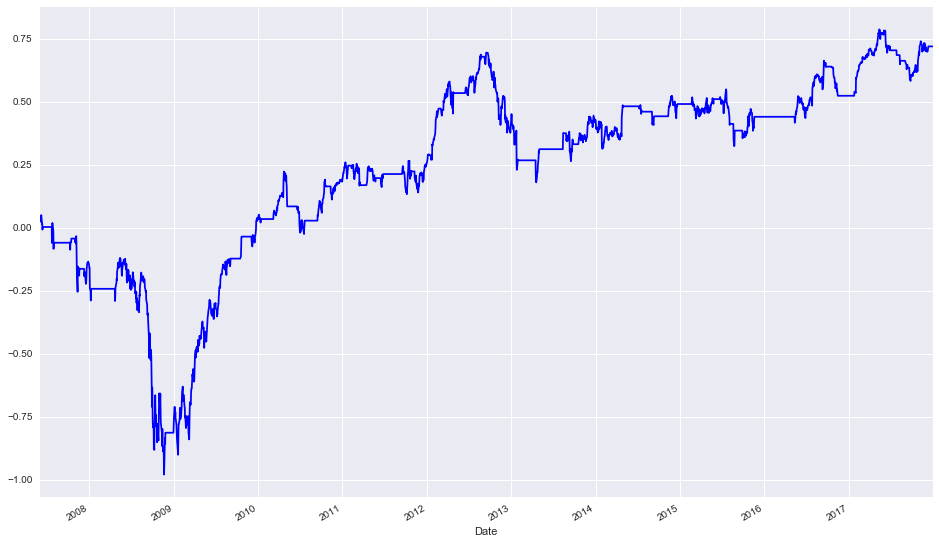

In [33]:
#Create an "empty" column as placeholder for our /position signals
data['Position'] = None
 
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(data)):
 
    if (data['VolRatio'].iloc[row] > 1.4) and (data['VolRatio'].iloc[row-1] < 1.4):
        data['Position'].iloc[row] = 1
 
    if (data['VolRatio'].iloc[row] < 0.4) and (data['VolRatio'].iloc[row-1] > 0.4):
        data['Position'].iloc[row] = 0 #-1  
 
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
data['Position'].fillna(method='ffill',inplace=True)
 
#Calculate the daily market return and multiply that by the position to determine strategy returns
data['Market Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy Return'] = data['Market Return'] * data['Position']
 
#Plot the strategy returns
data['Strategy Return'].cumsum().plot(subplots=True, color='blue',figsize=(16, 10))

In [35]:
import ffn
#%pylab inline
df2_portfolio_value =  data['Strategy Return'].cumsum()
perf2 = df2_portfolio_value.calc_stats()
print perf2.display()

Stats for Strategy Return from 2007-06-01 00:00:00 - 2017-12-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.04  -       -2052.04%

Annualized Returns:
mtd    3m      6m     ytd     1y      3y      5y      10y    incep.
-----  ------  -----  ------  ------  ------  ------  -----  --------
0.67%  18.76%  2.19%  37.39%  37.39%  13.58%  11.37%  -      -

Periodic:
        daily      monthly    yearly
------  ---------  ---------  --------
sharpe  0.04       -0.37      0.50
mean    77.67%     -438.64%   95.53%
vol     1763.40%   1181.41%   190.41%
skew    17.44      -7.71      1.52
kurt    1110.31    60.41      1.09
best    4444.38%   279.79%    467.80%
worst   -2483.04%  -2938.88%  -104.28%

Drawdowns:
max        avg        # days
---------  -------  --------
-2052.04%  -69.45%    100.73

Misc:
---------------  -------
avg. up month    35.64%
avg. down month  

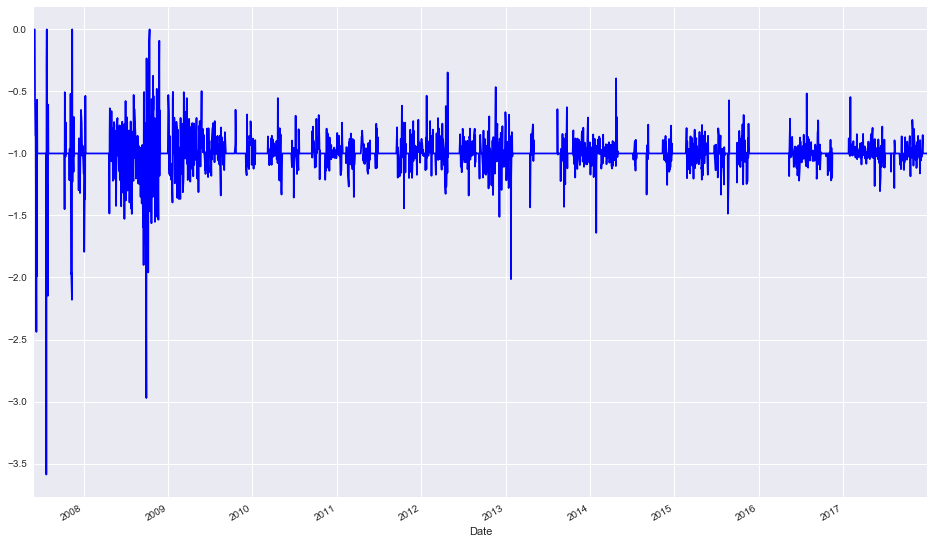

In [37]:
ax = perf.prices.to_drawdown_series().plot(subplots=True, color='blue',figsize=(16, 10))